In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
plt.style.use('bmh')

In [2]:
df2 = pd.read_csv("E:\\BA PROJECT\\Data_Project7.csv")
df2

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,Minions,PG,action and rude humor,60,2015,96.0,80
1,Minions,PG,action and rude humor,60,2015,96.0,80
2,Ratchet and Clank,PG,action and some rude humor,60,2016,74.0,80
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60,2014,NaN,82
4,Spy Kids 3: Game Over,PG,action sequences and peril,60,2003,64.0,80
...,...,...,...,...,...,...,...
995,The Discovery,TV-MA,NaN,110,2017,NaN,82
996,The Discovery,TV-MA,NaN,110,2017,NaN,82
997,The Wedding Party,TV-14,NaN,90,2016,NaN,82
998,Tramps,TV-MA,NaN,110,2017,NaN,82


In [3]:
df2.isnull().sum()

title                  0
rating                 0
ratingLevel           59
ratingDescription      0
release year           0
user rating score    395
user rating size       0
dtype: int64

In [4]:
df2["ratingLevel"].fillna("mild thematic elements", inplace = True)

In [5]:
df2["user rating score"].fillna(85, inplace = True)

In [6]:
df2

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,Minions,PG,action and rude humor,60,2015,96.0,80
1,Minions,PG,action and rude humor,60,2015,96.0,80
2,Ratchet and Clank,PG,action and some rude humor,60,2016,74.0,80
3,Iron Man & Captain America: Heroes United,PG,"action and violence throughout, and mild language",60,2014,85.0,82
4,Spy Kids 3: Game Over,PG,action sequences and peril,60,2003,64.0,80
...,...,...,...,...,...,...,...
995,The Discovery,TV-MA,mild thematic elements,110,2017,85.0,82
996,The Discovery,TV-MA,mild thematic elements,110,2017,85.0,82
997,The Wedding Party,TV-14,mild thematic elements,90,2016,85.0,82
998,Tramps,TV-MA,mild thematic elements,110,2017,85.0,82


In [7]:
df2.isnull().sum()

title                0
rating               0
ratingLevel          0
ratingDescription    0
release year         0
user rating score    0
user rating size     0
dtype: int64

In [8]:
df2.describe()

,ratingDescription,release year,user rating score,user rating size
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,67.36600,2010.335000,84.452000,80.783000
std,30.78561,8.877927,9.608747,0.973066
min,10.00000,1940.000000,55.000000,80.000000
25%,35.00000,2007.000000,83.000000,80.000000
50%,60.00000,2015.000000,85.000000,80.000000
75%,90.00000,2016.000000,91.000000,82.000000
max,124.00000,2017.000000,99.000000,82.000000


In [9]:
df2.nunique()

title                496
rating                13
ratingLevel           99
ratingDescription     11
release year          35
user rating score     42
user rating size       3
dtype: int64

# Univariate Analysis

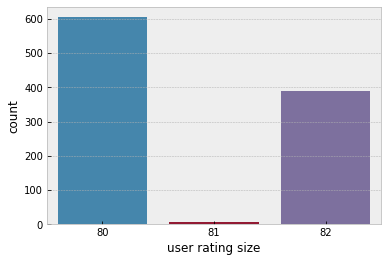

In [10]:
# Let us try to do the count by the categorical data columns

sns.countplot(x = 'user rating size' , data = df2)

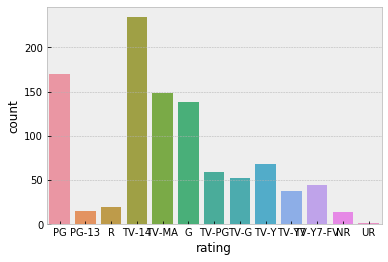

In [11]:
sns.countplot(x = 'rating' , data = df2)

In [12]:
# Values of above graph
df2['user rating size'].value_counts()

80    605
82    388
81      7
Name: user rating size, dtype: int64

In [13]:
# Now let us find out the other categorical column and do the same
df2.select_dtypes(include= 'object').columns

Index(['title', 'rating', 'ratingLevel'], dtype='object')

In [14]:
# Let us get the value counts of file type

df2['title'].value_counts()
df2['rating'].value_counts()
df2['ratingLevel'].value_counts()

Parents strongly cautioned. May be unsuitable for children ages 14 and under.      224
General Audiences. Suitable for all ages.                                          134
Suitable for all ages.                                                             120
For mature audiences.  May not be suitable for children 17 and under.              110
mild thematic elements                                                              66
                                                                                  ... 
thematic elements, brief violence and innuendo                                       1
dialogue, language, sexual situations and violence                                   1
language, drug content, sexuality/nudity, and some violence-all involving teens      1
thematic elements, an accident scene and some suggestive material                    1
some scary images and action, and brief mild language                                1
Name: ratingLevel, Length: 99, dtype: int64

In [15]:
# Now let us find out the numeric 

df2.select_dtypes(include= [np.number]).columns

Index(['ratingDescription', 'release year', 'user rating score',
       'user rating size'],
      dtype='object')

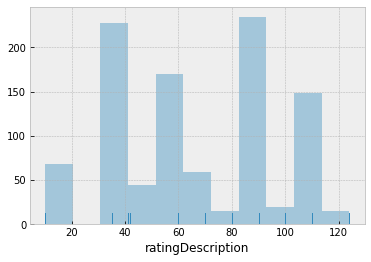

In [16]:
# Similar to this we can check for the distribution of the numeric colums

df2['ratingDescription'] = df2['ratingDescription'].fillna(axis=0, method='ffill')

sns.distplot(df2['ratingDescription'], kde=False, rug=True ,);

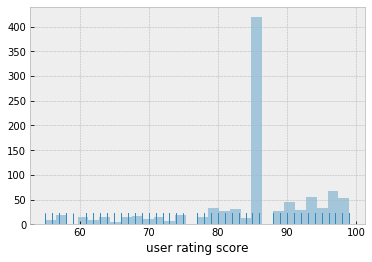

In [17]:
df2['user rating score'] = df2['user rating score'].fillna(axis=0, method='ffill')

sns.distplot(df2['user rating score'], kde=False, rug=True ,);

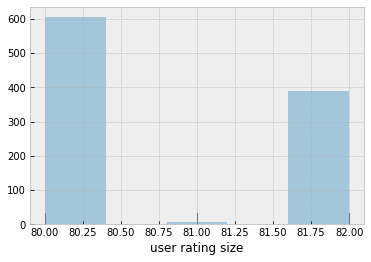

In [18]:
df2['user rating size'] = df2['user rating size'].fillna(axis=0, method='ffill')

sns.distplot(df2['user rating size'], kde=False, rug=True ,);

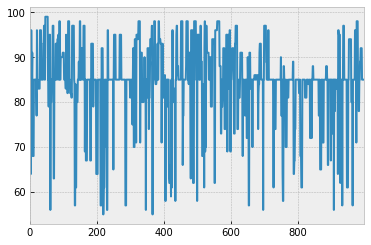

In [19]:
df2['user rating score'].plot()

In [20]:
# Early Rating levels (Pivot Table)
early_rating_level = pd.pivot_table(df2, values = "user rating score", columns = "release year", index = "title")
early_rating_level

release year,1940,1976,1978,1982,1986,1987,1989,1990,1991,1992,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100 Metros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN
13 Reasons Why,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0
3%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN
30 Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowbird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN
Young Justice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN
Zoobabu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


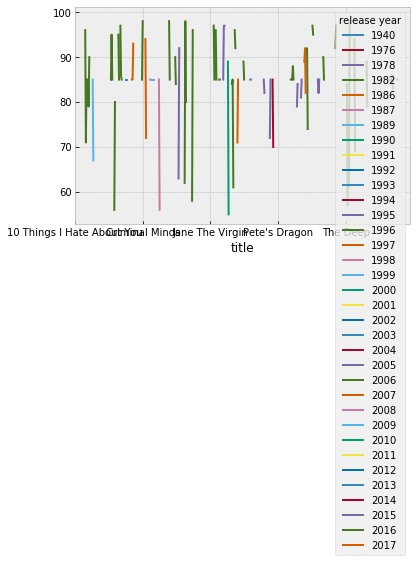

In [21]:
early_rating_level.plot()

Text(0, 0.5, 'user rating score')

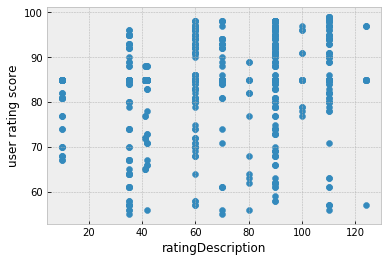

In [22]:
plt.scatter(df2["ratingDescription"], df2["user rating score"])
plt.xlabel('ratingDescription')
plt.ylabel('user rating score')

# Bivariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


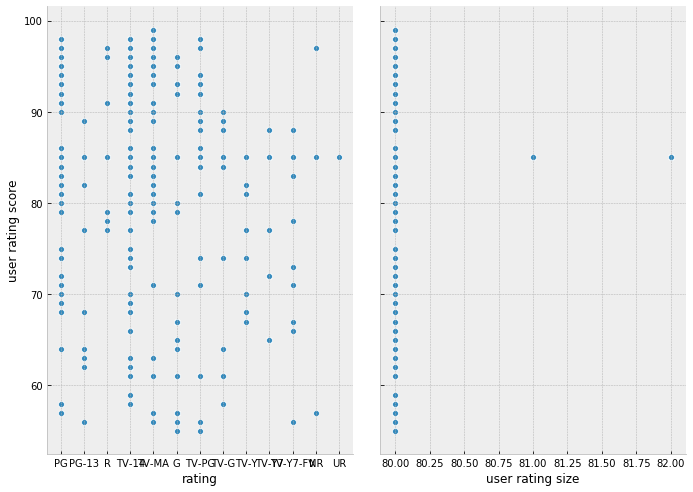

In [23]:
# Visualise the relationship between the features and the response using scatterplots
# As there is a lot of data just to show graph we have reduced the numbers

# In practice we will do our Y Vs the Multiple X graphs to understand its spread.


sns.pairplot(df2[0:10000], x_vars=['rating', 'user rating size'], y_vars='user rating score',
             size=7, aspect=0.7, kind='scatter')

# Correlation

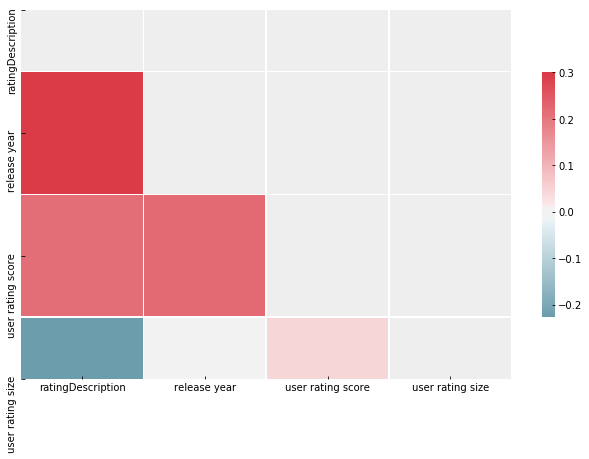

In [24]:
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Outlier Detection

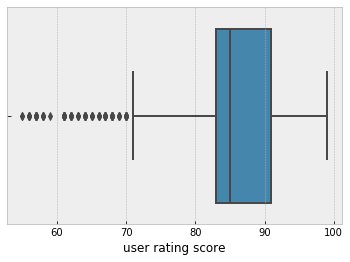

In [25]:
sns.boxplot(df2['user rating score'])

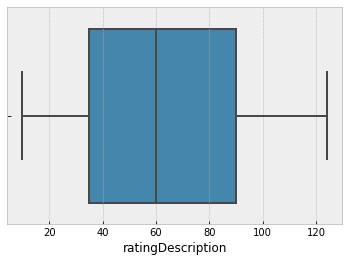

In [26]:
sns.boxplot(df2['ratingDescription'])

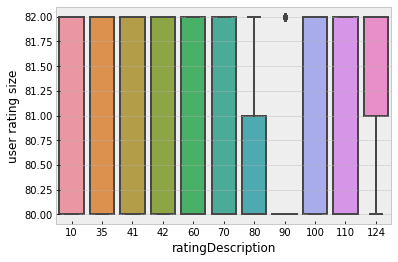

In [27]:
sns.boxplot(x="ratingDescription", y="user rating size", data=df2)